# Dividir el dataset en conjunto de training y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mainpath = "C:/Users/dguai/Documents/Courses/Machine Learning Data Science en Python/Practicas/Repositorios/Datasets"
data = pd.read_csv(mainpath + "/" + "Ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 2., 10., 21., 28., 42., 34., 30., 17.,  9.,  7.]),
 array([-2.20769152, -1.73895645, -1.27022138, -0.80148631, -0.33275125,
         0.13598382,  0.60471889,  1.07345396,  1.54218902,  2.01092409,
         2.47965916]),
 <BarContainer object of 10 artists>)

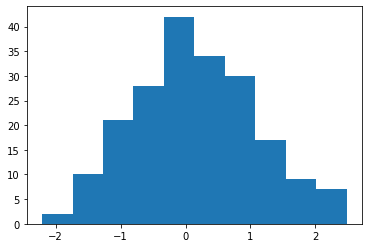

In [4]:
plt.hist(a)

In [5]:
check = (a < 0.8)
training = data[check]
testing = data[~check]

In [6]:
len(training),len(testing)

(149, 51)

In [7]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Sales~TV+Radio", data = training).fit()

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     683.3
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           7.54e-75
Time:                        20:00:52   Log-Likelihood:                -282.63
No. Observations:                 149   AIC:                             571.3
Df Residuals:                     146   BIC:                             580.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9892      0.325      9.208      0.000       2.348       3.631
TV             0.0466      0.002     29.540      0.000       0.043       0.050
Radio          0.1806      0.009     19.435      0.000       0.162       0.199
==============================================================================
Omnibus:                       56.347   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.436
Skew:                          -1.468   Prob(JB):                     3.60e-38
Kurtosis:                       7.377   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9892 + 0.0466 * TV + 0.1806 * Radio

### Validación del modelo con el conjunto de testing 

In [9]:
sales_pred = lm.predict(testing)
sales_pred

5      12.224861
6      11.589883
8       3.768879
10      7.114586
16     12.755732
17     23.243988
27     17.185440
28     19.468637
29      9.166089
34      7.698371
35     17.266324
39     20.414252
40     16.445827
51      9.398019
52     20.596422
54     20.422897
64     16.822982
66      8.898378
70     17.786348
73     10.044157
77     13.747032
81     14.896113
87     15.475750
88     11.705854
90     10.127864
93     21.263914
96     12.822676
102    17.860884
117     6.691296
118    15.506080
120    14.408613
122    13.853377
126    10.377113
128    22.096292
137    20.953182
141    18.401695
146    15.487951
147    23.162654
148    12.036225
150    18.570386
161    13.444797
162    15.030793
163    17.248218
165    14.522904
174    13.959455
181    14.139015
183    24.146683
185    20.679555
190    12.250541
191     8.455226
196     8.260566
dtype: float64

In [10]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

172.6624384221997

In [11]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.8966112236818138

In [13]:
sales_m = np.mean(testing["Sales"])
error = RSE/sales_m
error

0.12881498522808962